# HW 8: Clustering by K-Means
---

In [0]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
%matplotlib inline

# Import a Beer data set to a dataframe

In [0]:
#1 Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#2. Get the file
#make sure you upload all your data files to your Google drive and change share->Advanced->change->anyone with the link can view
downloaded = drive.CreateFile({'id':'1bjCoHPxe_96Ijoz8eCzYUikwlkPA6XDc'}) # replace the id with id of file you want to access
downloaded.GetContentFile('beer.txt')

In [0]:
url = 'beer.txt'
beer = pd.read_csv(url, sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


#### Let's pick the feature set

In [0]:
# Define X. 
X = beer.drop('name', axis=1)

In [0]:
X.head()

,calories,sodium,alcohol,cost
0,144,15,4.7,0.43
1,151,19,4.9,0.43
2,157,15,0.9,0.48
3,170,7,5.2,0.73
4,152,11,5.0,0.77


#### Do we need to define a target called Y? Explain.

**Answer:**  Since, we are solving the clustering problem which is an unsupervised problem, where we don't have the target feature in order to train the model. It is our job to figure out what the target value is of. We are trying to apply the structure to the data quantitatively and based on the specific criteria.

We make predictions based on the structure of the data.

## K-Means Clustering

#### Create a K-means model with three clusters and fit it with 'X'.

In [0]:
# 
model = KMeans(n_clusters = 3,random_state = 0)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

#### Review and show the cluster labels.

In [0]:
#
predicted = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", predicted)
print("Location of centroids: ")
print(centroids)


Predicted clusters to points:  [0 0 0 0 0 0 0 0 2 2 0 2 0 0 0 1 0 0 1 2]
Location of centroids: 
[[150.          17.           4.52142857   0.52071429]
 [ 70.          10.5          2.6          0.42      ]
 [102.75        10.           4.075        0.44      ]]


#### Add the cluster labels as an additional column('cluster') in the dataframe and print out the dataframe as sorted by cluster.

In [0]:
#
beer['cluster'] = predicted
beer.sort_values(by='cluster')


,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,0
3,Kronenbourg,170,7,5.2,0.73,0
4,Heineken,152,11,5.0,0.77,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
10,Coors,140,18,4.6,0.44,0


#### What feature(s) do the clusters seem to be based on? Why?

**Answer:** The clusters are most likely based on the calories. We had unscaled features  which makes the model to put more bias towards higher value based ones. Hence the cluster seems to be on calories features.

#### Show the cluster centers.

In [0]:
centroids=model.cluster_centers_
print("Location of centroids: ",centroids)

Location of centroids:  [[150.          17.           4.52142857   0.52071429]
 [ 70.          10.5          2.6          0.42      ]
 [102.75        10.           4.075        0.44      ]]


#### Calculate the mean of each feature for each cluster.

In [0]:
# hint: 
 beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,150.00,17.0,4.521429,0.520714
1,70.00,10.5,2.600000,0.420000
2,102.75,10.0,4.075000,0.440000


#### Save the `mean` of cluster centers as 'centers'.

In [0]:
#
centers = beer.groupby('cluster').mean()
centers

,calories,sodium,alcohol,cost
cluster,,,,
0,150.00,17.0,4.521429,0.520714
1,70.00,10.5,2.600000,0.420000
2,102.75,10.0,4.075000,0.440000


#### Create a "colors" array for plotting.

In [0]:

colors = np.array(['red', 'green', 'blue', 'yellow'])

#### Scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue).

Text(0, 0.5, 'alcohol')

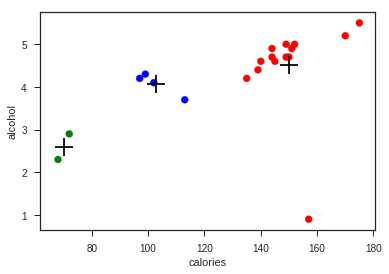

In [0]:
plt.scatter(beer['calories'],beer['alcohol'],c=colors[beer['cluster']])
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')
plt.xlabel('calories')
plt.ylabel('alcohol')

In [0]:
#

#### Create a scatter plot matrix (clusters should be colored as: 0=red, 1=green, 2=blue).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb037e06550>,
      dtype=object)

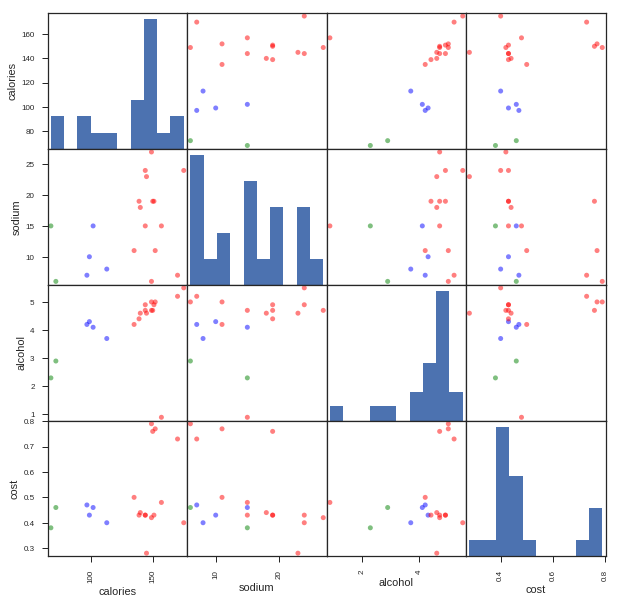

In [0]:
#
pd.plotting.scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100)

<a id="repeat-with-scaled-data"></a>
### Repeat With Scaled Data

Unscaled features cause most algorithms to put too much weight onto one feature. We can scale our data to make sure k-means accounts for all features.

#### Use StandardScaler to scale the data X.

In [0]:
#

X_scaled = StandardScaler().fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=['calories','sodium','alcohol','cost']);
X_scaled

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,calories,sodium,alcohol,cost
0,0.387913,0.007795,0.433808,-0.456830
1,0.625066,0.631369,0.622420,-0.456830
2,0.828339,0.007795,-3.149822,-0.102698
3,1.268765,-1.239354,0.905338,1.667960
4,0.658944,-0.615780,0.716726,1.951265
5,0.421792,1.254943,0.339502,-1.519224
6,1.438159,1.410837,1.188256,-0.669309
7,0.557308,1.878518,0.433808,-0.527656
8,-1.136637,-0.771673,0.056584,-0.456830
9,-0.662332,-1.083460,-0.509253,-0.669309


#### Show the scaled X indeed has mean and standard deviation close to 0 and 1, respectively.

In [0]:
#
print('Mean values')
print(X_scaled.mean())
print('Standard deviation values')
print(X_scaled.std())

Mean values
calories   -3.219647e-16
sodium      7.771561e-17
alcohol    -1.003711e-15
cost       -3.608225e-16
dtype: float64
Standard deviation values
calories    1.025978
sodium      1.025978
alcohol     1.025978
cost        1.025978
dtype: float64


#### Repeat K-means with three clusters on scaled data.

In [0]:
#
model1=KMeans(n_clusters=3,random_state=0)
model1.fit(X_scaled)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

#### Add the cluster labels as an additional column('cluster') in the dataframe and print out the dataframe as sorted by cluster.

In [0]:
#
predicted1=model1.labels_
X_scaled['cluster']=predicted1
X_scaled.sort_values(by='cluster')
X_scaled.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,-0.920659,-0.635266,-0.862900,-0.332884
1,0.536134,0.962643,0.516326,-0.616189
2,0.769051,-0.654753,0.693150,1.898145


In [0]:
X_scaled

#### What are the "characteristics" of each cluster?

**Answer:**  

Here the  Characteristic of each clusters are based up on  the mean values of the variables in the cluster
if you observe the cluster 0 cost variable from the above dataframe has higher mean, which is -0.3 and cluster 0 is seems to be more focussed on cost variable.

Now, in the second cluster that is cluster '1'  sodium variable has higher mean, which is 0.96 and cluster 1 is more focussed on sodium perspective.

Next, in the cluster '2' cost variable has higher mean value, which is of 1.89 and cluster 2 is more inclined towards on cost variable.

Here,  sodium, cost variable shows highest values,which seems to be uncommon. Alcohol and calories differentiated well


#### Show the cluster centers.

In [0]:
#

centroids=model1.cluster_centers_
print("Location of centroids: ",centroids)

Location of centroids:  [[-0.92065895 -0.6352664  -0.86290041 -0.33288365]
 [ 0.5361335   0.96264295  0.51632566 -0.61618888]
 [ 0.7690509  -0.6547531   0.69314951  1.89814505]]


#### Create scatter plot matrix of new cluster assignments (0=red, 1=green, 2=blue).

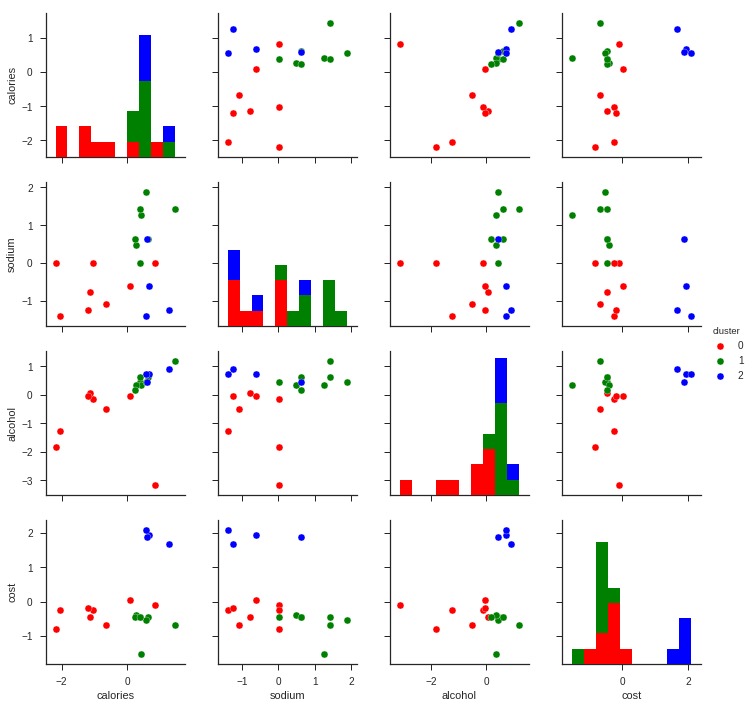

In [0]:
#
import seaborn as sns
sns.set(style="ticks")
colors = {0: 'red', 1: 'green', 2: 'blue'}
sns.pairplot(X_scaled, hue="cluster",palette=colors,vars=['calories','sodium','alcohol','cost']);


####  Do you notice any feaure(s) irrelevant in clustering assignments? How would you explain this?

**Answer:** It appears that `sodium` is not often useful in predicting the cluster. Perhaps sodium levels vary quite a lot amongst all types of beers and are not indicative of beer type (indeed, the sodium is quite low compared to most foods).

### Applying the elbow method to k-means

The [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering) is one possible method to help narrow in on the ideal value of **K**. The method is built around the concept of diminishing returns where the percentage of explained variance is reviewed as a function of the number of clusters: One should choose a number of clusters where the next cluster doesn't significantly explain additional variance. 

[Determining the right number of clusters](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set)   

Try a range of K and plot both the Inertia Over K and Silhouette Over K curves.

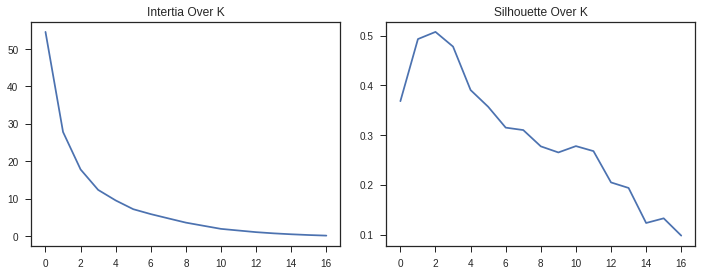

In [0]:
from sklearn.metrics import silhouette_score
from sklearn import metrics
values = range(2,19)
scores = []
for value in values:        
    model = KMeans(n_clusters = value)
    model.fit(X_scaled)
    score    = silhouette_score(X_scaled, model.labels_)
    inertia = model.inertia_
    scores.append({
                    "inertia":    inertia,
                    "silhouette": score
                })

eval_scores = pd.DataFrame(scores)
eval_scores.head()

fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
eval_scores["inertia"].plot(ax=ax[0], title="Intertia Over K")
eval_scores["silhouette"].plot(ax=ax[1], title="Silhouette Over K")


fig.tight_layout()

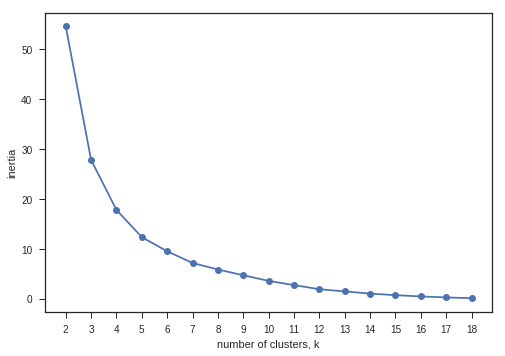

In [0]:
ks = range(2, 19)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X_scaled)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

#### Let's analyze the above

- Do you see the **"elbow"**?

- What's the best value of k?



**Answer** Yes, we can see elbow. The best value for "K" is 2 moreover, we can also see even from  Silhouetee graph that over K = 2 gives the maximum value.